In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
inspector = inspect(engine)
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
inspector = inspect(engine)
columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

results= session.query(Measurement.date, Measurement.id).\
     order_by(Measurement.id.desc()).all()
last_date = [result[0] for result in results[:1]]
last_date


['2017-08-23']

In [13]:
# Calculate the date 1 year ago from the last data point in the database
year= dt.timedelta(days = 365) 
for row in last_date:
    last= (dt.datetime.strptime(row, '%Y-%m-%d').strftime('%Y-%m-%d'))
last_dt= dt.datetime.strptime(last, '%Y-%m-%d')
year_ago = last_dt - year

print(last_dt)
print(year_ago)


2017-08-23 00:00:00
2016-08-23 00:00:00


In [14]:
# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.prcp, Measurement.date]
data = session.query(*sel).\
    filter(func.strftime('%Y-%m-%d', Measurement.date) >= '2016-08-23').\
    filter(func.strftime('%Y-%m-%d', Measurement.date) <= '2017-08-23').\
    order_by(Measurement.date).all()   
print(data)

[(0.0, '2016-08-23'), (0.15, '2016-08-23'), (0.05, '2016-08-23'), (None, '2016-08-23'), (0.02, '2016-08-23'), (1.79, '2016-08-23'), (0.7, '2016-08-23'), (0.08, '2016-08-24'), (2.15, '2016-08-24'), (2.28, '2016-08-24'), (None, '2016-08-24'), (1.22, '2016-08-24'), (2.15, '2016-08-24'), (1.45, '2016-08-24'), (0.08, '2016-08-25'), (0.08, '2016-08-25'), (0.0, '2016-08-25'), (0.0, '2016-08-25'), (0.21, '2016-08-25'), (0.06, '2016-08-25'), (0.11, '2016-08-25'), (0.0, '2016-08-26'), (0.03, '2016-08-26'), (0.02, '2016-08-26'), (0.04, '2016-08-26'), (0.0, '2016-08-26'), (0.01, '2016-08-26'), (0.0, '2016-08-27'), (0.18, '2016-08-27'), (0.02, '2016-08-27'), (0.0, '2016-08-27'), (0.12, '2016-08-27'), (None, '2016-08-27'), (0.01, '2016-08-28'), (0.14, '2016-08-28'), (0.14, '2016-08-28'), (0.14, '2016-08-28'), (0.6, '2016-08-28'), (2.07, '2016-08-28'), (0.0, '2016-08-29'), (0.17, '2016-08-29'), (0.04, '2016-08-29'), (None, '2016-08-29'), (0.0, '2016-08-29'), (0.35, '2016-08-29'), (0.9, '2016-08-29'),

In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df= pd.DataFrame(data, columns= ['prcp', 'date'])
prcp_df.set_index('date', inplace= True)
prcp_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


In [16]:
# Sort the dataframe by date
prcp_df= prcp_df.sort_values(by= ['date'])
prcp_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


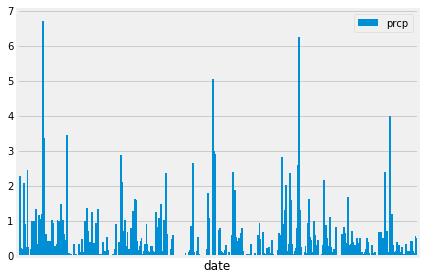

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data

prcp_df.plot.bar(width= 10)

plt.xticks([])

plt.tight_layout()
plt.show()


In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()


,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [19]:
# Design a query to show how many stations are available in this dataset?

stations= session.query(Measurement.id, Measurement.station).\
    order_by(Measurement.id.desc()).\
    group_by(Measurement.station).all()
stations

stations_df= pd.DataFrame(stations, columns= ['station', 'id'])
stations_df
stations_df['station'].count()


9

In [20]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
sel = [Measurement.station, func.count(Measurement.station)]
active_stations = session.query(*sel).\
    order_by(func.count(Measurement.station).desc()).\
    group_by(Measurement.station).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
sel = [Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]

temp_data = session.query(*sel).\
    filter(Measurement.station == "USC00519281").all()
temp_data_df= pd.DataFrame(temp_data, columns= ['station id', 'min temp', 'max temp', 'avg temp'])
temp_data_df

,station id,min temp,max temp,avg temp
0,USC00519281,54.0,85.0,71.663781


In [22]:
# Choose the station with the highest number of temperature observations.
sel = [Measurement.station, func.count(Measurement.tobs)]
num_temp = session.query(*sel).\
    order_by(func.count(Measurement.tobs).desc()).\
    group_by(Measurement.station).all()

num_temp

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel = [Measurement.station, Measurement.date, Measurement.tobs]
most_temp= session.query(*sel).\
    filter(Measurement.station == "USC00519281").\
    filter(func.strftime('%Y-%m-%d', Measurement.date) >= '2016-08-23').\
    filter(func.strftime('%Y-%m-%d', Measurement.date) <= '2017-08-23').\
    order_by(Measurement.date).all()  
most_temp
most_temp_df= pd.DataFrame(most_temp, columns= ["station","date", "temperature", ])
most_temp_df.set_index('date', inplace= True)
most_temp_df.sort_values(by= ['date'])
most_temp_df.head()

,station,temperature
date,,
2016-08-23,USC00519281,77.0
2016-08-24,USC00519281,77.0
2016-08-25,USC00519281,80.0
2016-08-26,USC00519281,80.0
2016-08-27,USC00519281,75.0


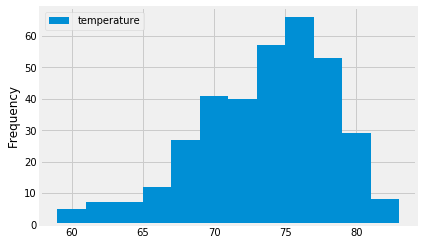

In [24]:
most_temp_df.plot.hist(bins = 12)

In [25]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [26]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
last_yr_temp= calc_temps('2017-03-25', '2017-03-30')
last_yr_temp_df= pd.DataFrame(last_yr_temp, columns= ["tmin", "tavg", "tmax"])
last_yr_temp_df["peak_to_peak"]= last_yr_temp_df["tmax"] - last_yr_temp_df["tmin"]
last_yr_temp_df

,tmin,tavg,tmax,peak_to_peak
0,68.0,74.833333,80.0,12.0


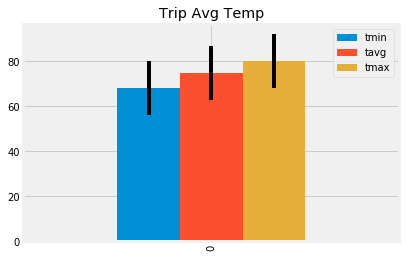

In [27]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

last_yr_temp_df.plot.bar(yerr= "peak_to_peak", title= "Trip Avg Temp" )
plt.yaxis = "tavg"


In [28]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
 
sel = [Measurement.station, func.sum(Measurement.prcp)]
trip_rain = session.query(*sel).\
    filter(func.strftime('%Y-%m-%d', Measurement.date) >= '2017-03-25').\
    filter(func.strftime('%Y-%m-%d', Measurement.date) <= '2017-03-30').\
    group_by(Measurement.station).\
    order_by(func.sum(Measurement.prcp).desc()).all()

trip_rain


trip_rain_df= pd.DataFrame(trip_rain, columns= ["station id", "sum prcp"])
trip_rain_df


,station id,sum prcp
0,USC00516128,1.23
1,USC00519281,0.99
2,USC00519523,0.51
3,USC00513117,0.24
4,USC00514830,0.06
5,USC00519397,0.00
6,USC00517948,NaN


In [29]:

sel = [Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation]
trip_loc= session.query(*sel).\
    group_by(Station.id).all()
trip_loc

trip_loc_df= pd.DataFrame(trip_loc, columns= ["station id", "name", "latitude", "longitude", "elevation"])


trip_loc_df

,station id,name,latitude,longitude,elevation
0,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [30]:
trip_rain_df.merge(trip_loc_df, on= "station id")


,station id,sum prcp,name,latitude,longitude,elevation
0,USC00516128,1.23,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
1,USC00519281,0.99,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
2,USC00519523,0.51,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
3,USC00513117,0.24,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
4,USC00514830,0.06,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
5,USC00519397,0.00,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
6,USC00517948,NaN,"PEARL CITY, HI US",21.39340,-157.97510,11.9


In [32]:
#Calculate the rainfall per weather station using the previous year's matching dates.
 
sel = [Measurement.station, func.sum(Measurement.prcp)]
station_rain = session.query(*sel).\
    filter(func.strftime('%Y-%m-%d', Measurement.date) >= '2016-08-23').\
    filter(func.strftime('%Y-%m-%d', Measurement.date) <= '2017-08-23').\
    group_by(Measurement.station).\
    order_by(func.sum(Measurement.prcp).desc()).all()
station_rain


[('USC00516128', 147.81000000000006),
 ('USC00519281', 70.03000000000003),
 ('USC00513117', 48.510000000000026),
 ('USC00519523', 38.01),
 ('USC00514830', 33.239999999999995),
 ('USC00519397', 16.089999999999986),
 ('USC00517948', 4.59)]

In [48]:
#Calculate the daily normals. Normals are the averages for the min, avg, and max temperatures.

sel = [Measurement.date, func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
daily_norm = session.query(*sel).\
    filter(func.strftime('%Y-%m-%d', Measurement.date) >= '2016-08-23').\
    filter(func.strftime('%Y-%m-%d', Measurement.date) <= '2017-08-23').\
    group_by(Measurement.date).all()
daily_norm
                                                                        
daily_norm_df= pd.DataFrame(daily_norm, columns= ["date", "tmin", "tavg", "tmax"])
daily_norm_df.head()

daily_norm_df.mean()


tmin    70.680328
tavg    74.683873
tmax    78.202186
dtype: float64

In [49]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [106]:
sel = [Measurement.date]
dates = session.query(*sel).\
    filter(func.strftime('%Y-%m-%d', Measurement.date) >= '2017-03-25').\
    filter(func.strftime('%Y-%m-%d', Measurement.date) <= '2017-03-30').\
    order_by(func.strftime('%Y-%m-%d', Measurement.date)).all()
dates


[('2017-03-25'),
 ('2017-03-25'),
 ('2017-03-25'),
 ('2017-03-25'),
 ('2017-03-25'),
 ('2017-03-26'),
 ('2017-03-26'),
 ('2017-03-26'),
 ('2017-03-26'),
 ('2017-03-26'),
 ('2017-03-27'),
 ('2017-03-27'),
 ('2017-03-27'),
 ('2017-03-27'),
 ('2017-03-27'),
 ('2017-03-27'),
 ('2017-03-28'),
 ('2017-03-28'),
 ('2017-03-28'),
 ('2017-03-28'),
 ('2017-03-28'),
 ('2017-03-28'),
 ('2017-03-28'),
 ('2017-03-29'),
 ('2017-03-29'),
 ('2017-03-29'),
 ('2017-03-29'),
 ('2017-03-29'),
 ('2017-03-29'),
 ('2017-03-29'),
 ('2017-03-30'),
 ('2017-03-30'),
 ('2017-03-30'),
 ('2017-03-30'),
 ('2017-03-30'),
 ('2017-03-30')]

In [102]:
dates1 = [dates[0] for date in dates]


In [103]:
for x in dates1:
    dt.datetime.strptime(dates1(x), '%Y-%m-%d').strftime('%m-%d')

TypeError: 'list' object is not callable

In [110]:
# calculate the daily normals for your trip
for date in dates:
    
    def daily_normals(date):
        sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
        return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
normals= []
for date in daily_normals:
    normals_dict ={}
    normals_dict["date"]= Measurement.date
    normals_dict["tobs"]= Mesurement.tobs
    normals.append(normals_dict)
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date

daily_normals

TypeError: 'function' object is not iterable

In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

In [ ]:
# Plot the daily normals as an area plot with `stacked=False`